В этом уроке мы продолжим наше знакомство с регрессионными анализом и научимся применять множественный регрессионный анализ.

Ссылка на скрипт урока:

https://stepic.org/media/attachments/lesson/11509/multiple%20regression.R

In [8]:
library(ggplot2)

In [9]:
fit <- lm(Fertility ~ Examination + Catholic, data = swiss)
summary(fit)


Call:
lm(formula = Fertility ~ Examination + Catholic, data = swiss)

Residuals:
     Min       1Q   Median       3Q      Max 
-26.2643  -5.6510  -0.0017   7.7268  17.7103 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 83.03566    4.97730  16.683  < 2e-16 ***
Examination -0.88619    0.21736  -4.077 0.000188 ***
Catholic     0.04179    0.04158   1.005 0.320322    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.641 on 44 degrees of freedom
Multiple R-squared:  0.4302,	Adjusted R-squared:  0.4043 
F-statistic: 16.61 on 2 and 44 DF,  p-value: 4.218e-06


In [10]:
fit2 <- lm(Fertility ~ Examination*Catholic, data = swiss)
summary(fit2)


Call:
lm(formula = Fertility ~ Examination * Catholic, data = swiss)

Residuals:
     Min       1Q   Median       3Q      Max 
-25.5446  -5.3640   0.5461   7.5383  18.5540 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          80.957567   6.471732  12.509 6.37e-16 ***
Examination          -0.765480   0.323031  -2.370   0.0224 *  
Catholic              0.083823   0.092648   0.905   0.3706    
Examination:Catholic -0.003337   0.006559  -0.509   0.6135    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.723 on 43 degrees of freedom
Multiple R-squared:  0.4337,	Adjusted R-squared:  0.3941 
F-statistic: 10.98 on 3 and 43 DF,  p-value: 1.77e-05


In [11]:
confint(fit2)

,2.5 %,97.5 %
(Intercept),67.90607532,94.009058379
Examination,-1.41693405,-0.114025080
Catholic,-0.10301954,0.270665084
Examination:Catholic,-0.01656482,0.009890962


Напишите функцию fill_na, которая принимает на вход данные с тремя переменными:

x_1  -  числовой вектор

x_2 - числовой вектор

y - числовой вектор с пропущенными значениями.

Теперь — ﻿самое интересное. На первом этапе, используя только наблюдения, в которых нет пропущенных значений, мы построим регрессионную модель (без взаимодействий), где  y — зависимая переменная, x_1 и x_2 — независимые переменные. Затем, используя построенную модель, мы заполним пропущенные значения предсказаниями модели.

Функция должна возвращать dataframe c новой переменной  y_full. Сохраните в нее переменную y, в которой пропущенные значения заполнены предсказанными значениями построенной модели.
```r
> test_data <- read.csv("https://stepic.org/media/attachments/course/129/fill_na_test.csv"﻿)
> fill_na﻿(test_data)
   x_1 x_2  y   y_full
1    9  22 14 14.00000
2   14  35  9  9.00000
3   10  45 NA 13.12727
4    6  35 NA 13.30132
5   11  36 16 16.00000
6    5  27 11 11.00000
7    9  34 NA 12.83632
8    6  25 NA 12.90783
9   11  38 13 13.00000
10  12  23 NA 11.97784﻿
```

In [12]:
df <- read.csv("https://stepic.org/media/attachments/course/129/fill_na_test.csv")

In [13]:
fill_na <- function(df){
    fit <- lm( y ~ x_1 + x_2, df, na.action = 'na.exclude') #df[-c(which(is.na(df[,3]))),]
    df$y_full <- df$y
    df[which(is.na(df[,3])),4] <- predict(fit, df[1:2])[-c(which(!is.na(df[,3])))]
    return (df)
}

In [14]:
fill_na(df)

x_1,x_2,y,y_full
9,22,14,14.00000
14,35,9,9.00000
10,45,NA,13.12727
6,35,NA,13.30132
11,36,16,16.00000
5,27,11,11.00000
9,34,NA,12.83632
6,25,NA,12.90783
11,38,13,13.00000
12,23,NA,11.97784


В переменной df сохранен subset данных mtcars только с переменными "wt", "mpg", "disp", "drat", "hp". Воспользуйтесь множественным регрессионным анализом, чтобы предсказать вес машины (переменная "wt"). Выберите такую комбинацию независимых переменных (из "mpg", "disp", "drat", "hp"), чтобы значение R^2 adjusted было наибольшим. Взаимодействия факторов учитывать не надо. 

Выполните все операции по сравнению моделей на вашем компьютере.
В поле для ответа сохраните в переменную  model регрессионную модель с оптимальной комбинацией предикторов!


https://stepik.org/lesson/9995/step/3?course=%D0%9E%D1%81%D0%BD%D0%BE%D0%B2%D1%8B-%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B8&unit=1925

In [15]:
library("MASS")

In [16]:
u <- glm.nb(wt ~ ., data = mtcars[c("wt", "mpg", "disp", "drat", "hp")])
quine.nb2 <- stepAIC(u)
quine.nb2$anova

Warning message in dpois(y, mu, log = TRUE):
"non-integer x = 2.620000"Warning message in dpois(y, mu, log = TRUE):
"non-integer x = 2.875000"Warning message in dpois(y, mu, log = TRUE):
"non-integer x = 2.320000"Warning message in dpois(y, mu, log = TRUE):
"non-integer x = 3.215000"Warning message in dpois(y, mu, log = TRUE):
"non-integer x = 3.440000"Warning message in dpois(y, mu, log = TRUE):
"non-integer x = 3.460000"Warning message in dpois(y, mu, log = TRUE):
"non-integer x = 3.570000"Warning message in dpois(y, mu, log = TRUE):
"non-integer x = 3.190000"Warning message in dpois(y, mu, log = TRUE):
"non-integer x = 3.150000"Warning message in dpois(y, mu, log = TRUE):
"non-integer x = 3.440000"Warning message in dpois(y, mu, log = TRUE):
"non-integer x = 3.440000"Warning message in dpois(y, mu, log = TRUE):
"non-integer x = 4.070000"Warning message in dpois(y, mu, log = TRUE):
"non-integer x = 3.730000"Warning message in dpois(y, mu, log = TRUE):
"non-integer x = 3.780000"Warnin

Start:  AIC=107.73
wt ~ mpg + disp + drat + hp



Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
"iteration limit reached"Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
"iteration limit reached"Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
"iteration limit reached"Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
"iteration limit reached"Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
"iteration limit reached"Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
"iteration limit reached"Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
"iteration limit reached"Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
"iteration limit reached"

       Df    AIC
- drat  1 105.75
- hp    1 105.84
- disp  1 106.11
- mpg   1 106.45
<none>    107.73


Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
"iteration limit reached"Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
"iteration limit reached"


Step:  AIC=105.75
wt ~ mpg + disp + hp



Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
"iteration limit reached"Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
"iteration limit reached"Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
"iteration limit reached"Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
"iteration limit reached"Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
"iteration limit reached"Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
"iteration limit reached"

       Df    AIC
- hp    1 103.93
- disp  1 104.32
- mpg   1 104.65
<none>    105.75


Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
"iteration limit reached"Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
"iteration limit reached"


Step:  AIC=103.93
wt ~ mpg + disp



Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
"iteration limit reached"Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
"iteration limit reached"Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
"iteration limit reached"Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
"iteration limit reached"

       Df    AIC
- disp  1 102.35
- mpg   1 102.67
<none>    103.93


Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
"iteration limit reached"Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
"iteration limit reached"


Step:  AIC=102.35
wt ~ mpg



Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
"iteration limit reached"Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
"iteration limit reached"

       Df    AIC
<none>    102.35
- mpg   1 107.75


Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
,NA,NA,27,1.201208,107.7272
- drat,1,0.0185890,28,1.219797,105.7458
- hp,1,0.1864113,29,1.406208,103.9323
- disp,1,0.4219319,30,1.828140,102.3542


Воспользуйтесь встроенным датасетом attitude, чтобы предсказать рейтинг (rating) по переменным complaints и critical. Каково t-значение для взаимодействия двух факторов?

Разделителем целой и дробной части в ответе должна быть запятая!


In [17]:
summary(lm(rating ~ complaints*critical, attitude ))


Call:
lm(formula = rating ~ complaints * critical, data = attitude)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.1988  -6.2054   0.3718   6.1426   9.6796 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)
(Intercept)         26.923536  41.643872   0.647    0.524
complaints           0.551382   0.649862   0.848    0.404
critical            -0.181353   0.595686  -0.304    0.763
complaints:critical  0.002907   0.009192   0.316    0.754

Residual standard error: 7.243 on 26 degrees of freedom
Multiple R-squared:  0.6825,	Adjusted R-squared:  0.6459 
F-statistic: 18.63 on 3 and 26 DF,  p-value: 1.169e-06


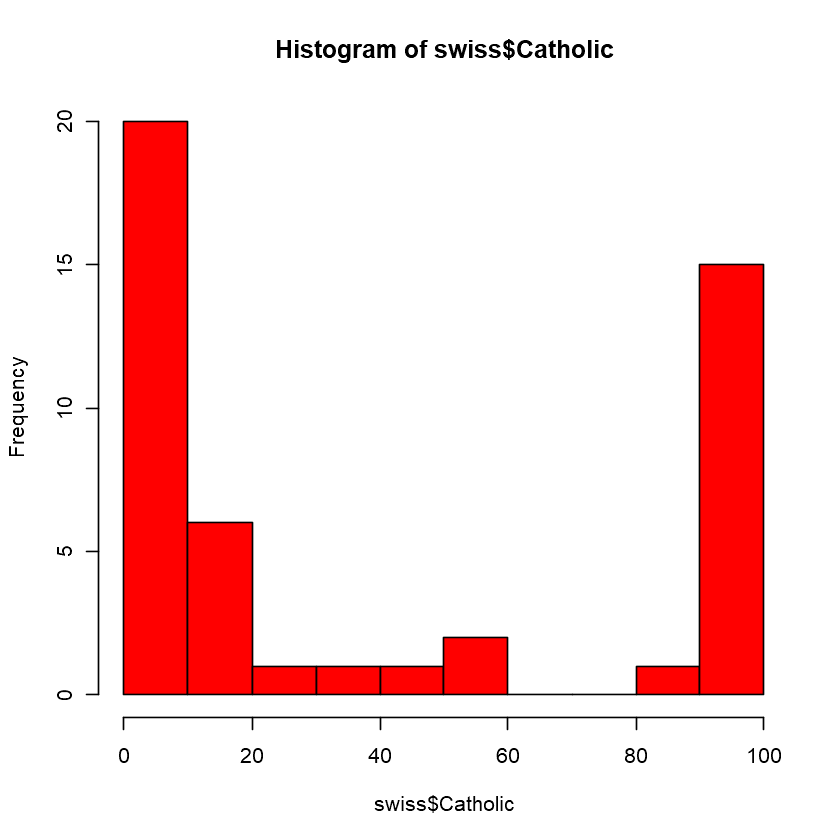

In [18]:
hist(swiss$Catholic, col = 'red')

In [19]:
swiss$religious <- ifelse(swiss$Catholic > 60, 'Lots', 'Few')
swiss$religious <- as.factor(swiss$religious)

In [20]:
fit3 <- lm(Fertility ~ Examination + religious, data = swiss)
summary(fit3)


Call:
lm(formula = Fertility ~ Examination + religious, data = swiss)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.9026  -4.8974   0.1926   7.1239  15.4542 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    78.5753     4.7701  16.472   <2e-16 ***
Examination    -0.6858     0.2222  -3.086   0.0035 ** 
religiousLots   8.4469     3.7016   2.282   0.0274 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.221 on 44 degrees of freedom
Multiple R-squared:  0.4788,	Adjusted R-squared:  0.4552 
F-statistic: 20.21 on 2 and 44 DF,  p-value: 5.934e-07


In [21]:
fit4 <- lm(Fertility ~ religious*Examination, data = swiss)
summary(fit4)


Call:
lm(formula = Fertility ~ religious * Examination, data = swiss)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.6289  -4.2417   0.0795   6.4508  14.0243 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                82.1160     5.0736  16.185  < 2e-16 ***
religiousLots              -2.9615     7.4096  -0.400 0.691366    
Examination                -0.8617     0.2389  -3.607 0.000801 ***
religiousLots:Examination   1.0096     0.5723   1.764 0.084839 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.007 on 43 degrees of freedom
Multiple R-squared:  0.514,	Adjusted R-squared:  0.4801 
F-statistic: 15.16 on 3 and 43 DF,  p-value: 7.128e-07


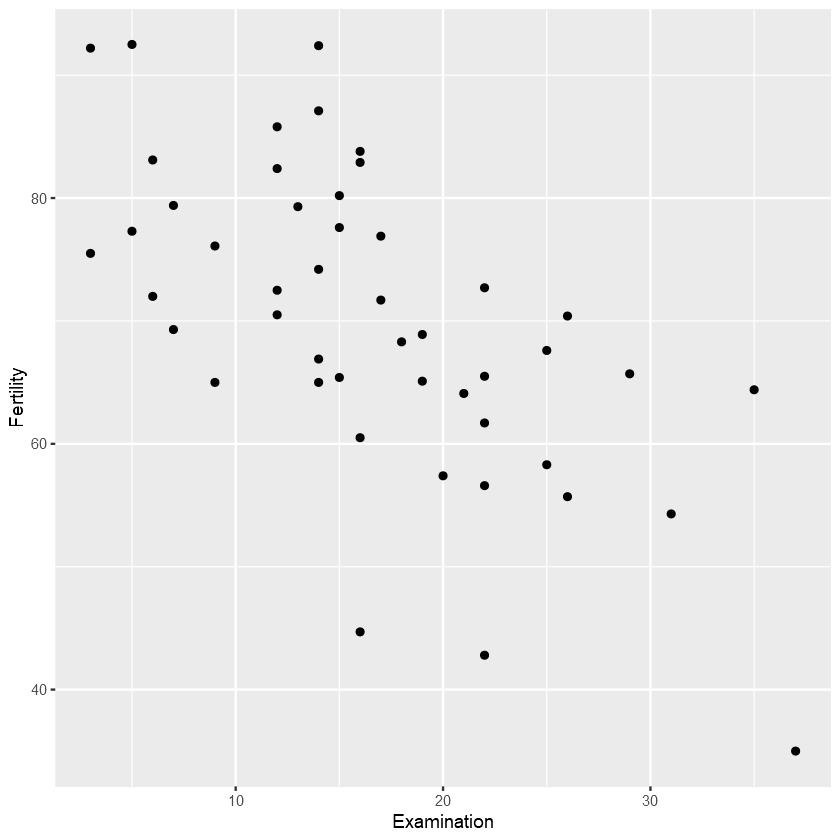

In [22]:

ggplot(swiss, aes(x = Examination, y = Fertility)) + 
  geom_point() 

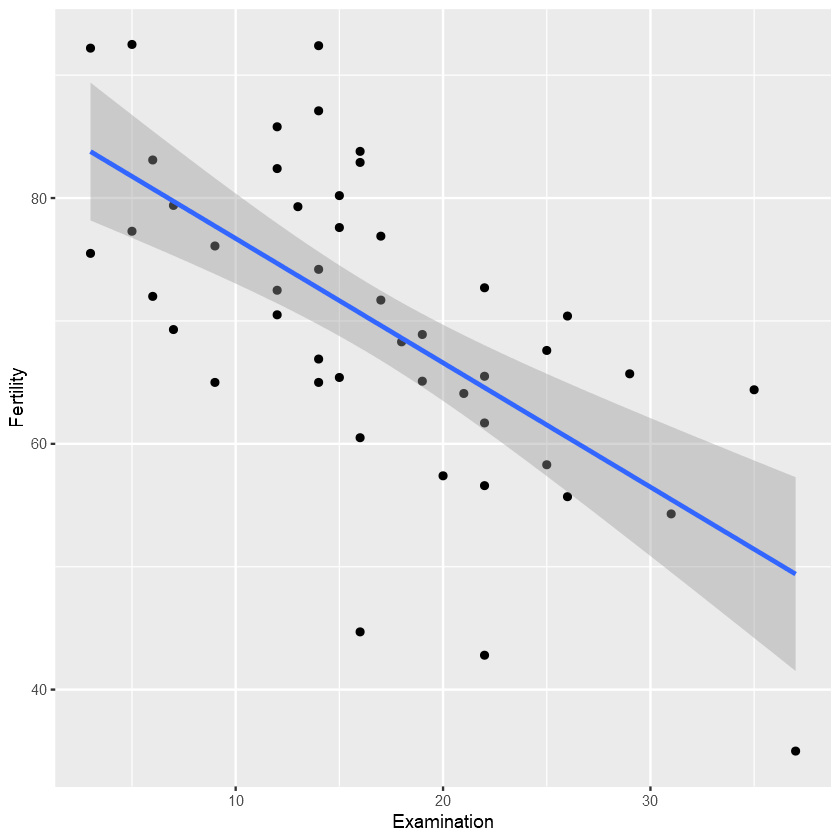

In [23]:

ggplot(swiss, aes(x = Examination, y = Fertility)) + 
  geom_point() + 
  geom_smooth(method = 'lm')

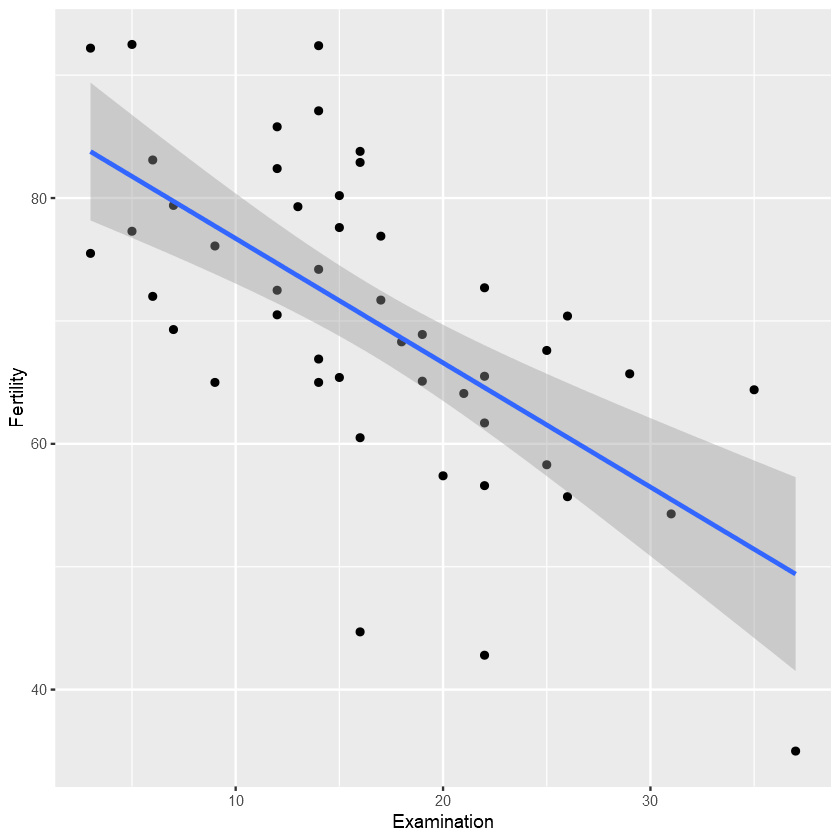

In [24]:

ggplot(swiss, aes(x = Examination, y = Fertility)) + 
  geom_point() + 
  geom_smooth(method = 'lm')

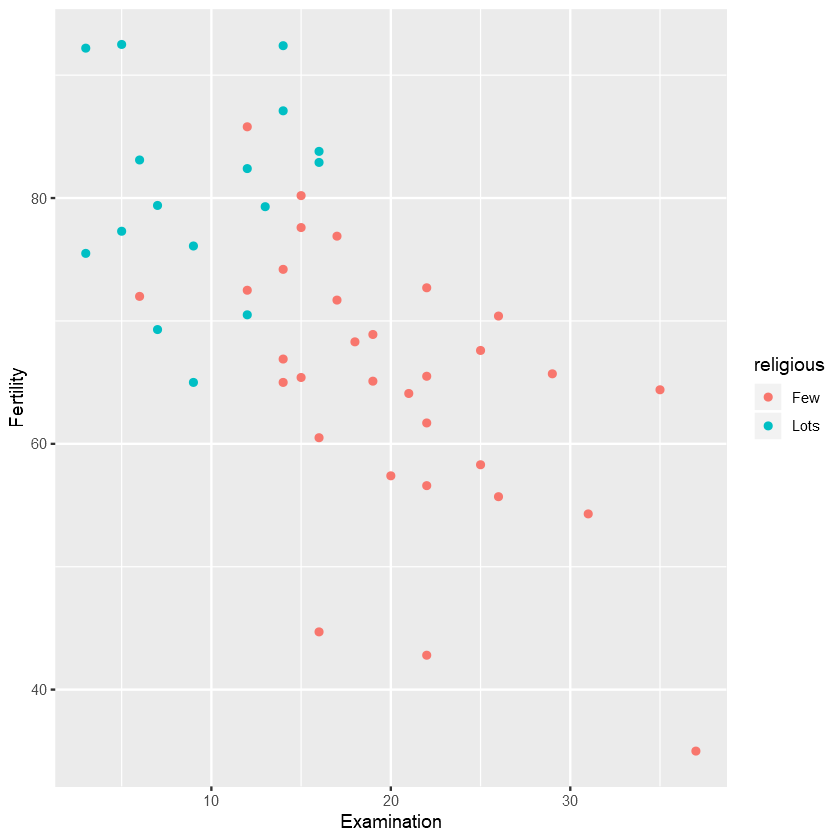

In [25]:
ggplot(swiss, aes(x = Examination, y = Fertility, col = religious)) + 
  geom_point() 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


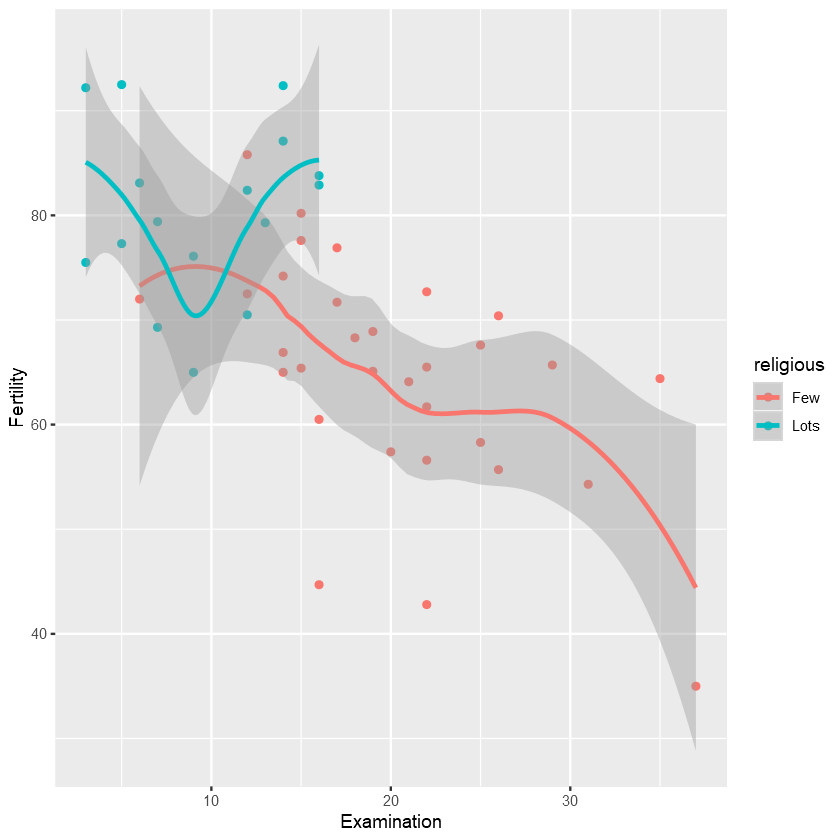

In [26]:
ggplot(swiss, aes(x = Examination, y = Fertility, col = religious)) + 
  geom_point()  + 
  geom_smooth()

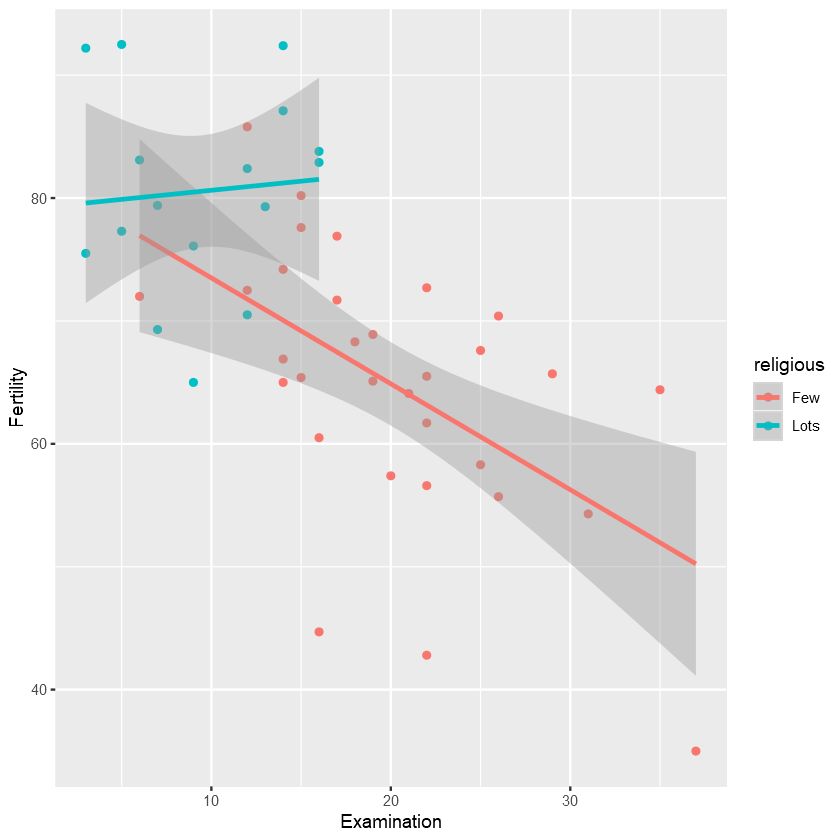

In [27]:
ggplot(swiss, aes(x = Examination, y = Fertility, col = religious)) + 
  geom_point()  + 
  geom_smooth(method = 'lm')


In [28]:
fit5 <- lm(Fertility ~ religious*Infant.Mortality*Examination, data = swiss)
summary(fit5)



Call:
lm(formula = Fertility ~ religious * Infant.Mortality * Examination, 
    data = swiss)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.0786  -3.8828  -0.4703   6.5309  13.7874 

Coefficients:
                                           Estimate Std. Error t value Pr(>|t|)
(Intercept)                                42.58729   39.26835   1.085    0.285
religiousLots                              63.11979   51.23986   1.232    0.225
Infant.Mortality                            1.90263    1.95983   0.971    0.338
Examination                                -0.26652    1.55994  -0.171    0.865
religiousLots:Infant.Mortality             -3.06561    2.60459  -1.177    0.246
religiousLots:Examination                  -5.15196    3.83370  -1.344    0.187
Infant.Mortality:Examination               -0.02463    0.07879  -0.313    0.756
religiousLots:Infant.Mortality:Examination  0.26928    0.18352   1.467    0.150

Residual standard error: 8.584 on 39 degrees of freedom
Multiple 

In [29]:
# model comparison

rm(swiss)
swiss <- data.frame(swiss)

In [30]:
fit_full <- lm(Fertility ~ ., data = swiss)
summary(fit_full)


Call:
lm(formula = Fertility ~ ., data = swiss)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2743  -5.2617   0.5032   4.1198  15.3213 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      66.91518   10.70604   6.250 1.91e-07 ***
Agriculture      -0.17211    0.07030  -2.448  0.01873 *  
Examination      -0.25801    0.25388  -1.016  0.31546    
Education        -0.87094    0.18303  -4.758 2.43e-05 ***
Catholic          0.10412    0.03526   2.953  0.00519 ** 
Infant.Mortality  1.07705    0.38172   2.822  0.00734 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.165 on 41 degrees of freedom
Multiple R-squared:  0.7067,	Adjusted R-squared:  0.671 
F-statistic: 19.76 on 5 and 41 DF,  p-value: 5.594e-10


In [31]:
fit_reduced1 <- lm(Fertility ~ Infant.Mortality + Examination + Catholic + Education, data = swiss)
summary(fit_reduced1)


Call:
lm(formula = Fertility ~ Infant.Mortality + Examination + Catholic + 
    Education, data = swiss)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.7141  -5.1741  -0.6893   4.2776  14.7346 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      50.02821    8.66076   5.776 8.33e-07 ***
Infant.Mortality  1.30568    0.39150   3.335 0.001791 ** 
Examination      -0.10580    0.26037  -0.406 0.686539    
Catholic          0.08631    0.03649   2.365 0.022717 *  
Education        -0.70416    0.17969  -3.919 0.000322 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.579 on 42 degrees of freedom
Multiple R-squared:  0.6639,	Adjusted R-squared:  0.6319 
F-statistic: 20.74 on 4 and 42 DF,  p-value: 1.703e-09


In [32]:
anova(fit_full, fit_reduced1)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
41,2105.043,NA,NA,NA,NA
42,2412.759,-1,-307.7161,5.993398,0.01872715


In [33]:
fit_reduced2 <- lm(Fertility ~ Infant.Mortality + Education + Catholic + Agriculture, data = swiss)
summary(fit_reduced2)


Call:
lm(formula = Fertility ~ Infant.Mortality + Education + Catholic + 
    Agriculture, data = swiss)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.6765  -6.0522   0.7514   3.1664  16.1422 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      62.10131    9.60489   6.466 8.49e-08 ***
Infant.Mortality  1.07844    0.38187   2.824  0.00722 ** 
Education        -0.98026    0.14814  -6.617 5.14e-08 ***
Catholic          0.12467    0.02889   4.315 9.50e-05 ***
Agriculture      -0.15462    0.06819  -2.267  0.02857 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.168 on 42 degrees of freedom
Multiple R-squared:  0.6993,	Adjusted R-squared:  0.6707 
F-statistic: 24.42 on 4 and 42 DF,  p-value: 1.717e-10


In [34]:
anova(fit_full, fit_reduced2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
41,2105.043,NA,NA,NA,NA
42,2158.069,-1,-53.02656,1.0328,0.3154617


In [35]:
# model selection

optimal_fit <-  step(fit_full, direction = 'backward')
summary(optimal_fit)

Start:  AIC=190.69
Fertility ~ Agriculture + Examination + Education + Catholic + 
    Infant.Mortality

                   Df Sum of Sq    RSS    AIC
- Examination       1     53.03 2158.1 189.86
<none>                          2105.0 190.69
- Agriculture       1    307.72 2412.8 195.10
- Infant.Mortality  1    408.75 2513.8 197.03
- Catholic          1    447.71 2552.8 197.75
- Education         1   1162.56 3267.6 209.36

Step:  AIC=189.86
Fertility ~ Agriculture + Education + Catholic + Infant.Mortality

                   Df Sum of Sq    RSS    AIC
<none>                          2158.1 189.86
- Agriculture       1    264.18 2422.2 193.29
- Infant.Mortality  1    409.81 2567.9 196.03
- Catholic          1    956.57 3114.6 205.10
- Education         1   2249.97 4408.0 221.43



Call:
lm(formula = Fertility ~ Agriculture + Education + Catholic + 
    Infant.Mortality, data = swiss)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.6765  -6.0522   0.7514   3.1664  16.1422 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      62.10131    9.60489   6.466 8.49e-08 ***
Agriculture      -0.15462    0.06819  -2.267  0.02857 *  
Education        -0.98026    0.14814  -6.617 5.14e-08 ***
Catholic          0.12467    0.02889   4.315 9.50e-05 ***
Infant.Mortality  1.07844    0.38187   2.824  0.00722 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.168 on 42 degrees of freedom
Multiple R-squared:  0.6993,	Adjusted R-squared:  0.6707 
F-statistic: 24.42 on 4 and 42 DF,  p-value: 1.717e-10


# Памятка по интерпретации результатов регрессионного анализа с категориальными и непрерывными переменными
Модель для примера: 

DV ~ IV_numeric * IV_categorical

IV_categorical - фактор с двумя уровнями (Level1 и Level2)

Коэффициенты:

Intercept — предсказанное значение DV для первого уровня IV_categorical с учётом того, что IV_numeric равна нулю.

IV_numeric — насколько изменяется предсказанное значение DV при увеличении IV_numeric на одну единицу в группе, соответствующей первому уровню IV_categorical

IV_categoricalLevel2 — насколько изменяется предсказанное значение DV при переходе от первого уровня IV_categorical ко второму уровню. С учётом того, что IV_numeric равна нулю. 

IV_numeric:IV_categoricalLevel2 — насколько сильнее (или слабее) изменяется предсказанное значение DV при увеличении IV_numeric на одну единицу в группе, соответствующей второму уровню IV_categorical, по сравнению с первым уровнем. 

# Как предсказывать значения в новом датасете на основе полученных коэффициентов

1). Предположим у нас есть новый объект, про который мы знаем, что он принадлежит к группе, соответствующей IV_categorical (Level1) и измеренный у него IV_numeric составил 10:

Предсказанное значение DV = Intercept + 10 * IV_numeric

2). Предположим у нас есть новый объект, про который мы знаем, что он принадлежит к группе, соответствующей IV_categorical (Level2) и измеренный у него IV_numeric составил 6:
 
Предсказанное значение DV = Intercept + IV_categoricalLevel2 + 6 * (IV_numeric + IV_numeric:IV_categoricalLevel2)

___________________________________________________

В этом примере будем работать с хорошо вам известным встроенным датасетом mtcars. Переменная am говорит о том, какая коробка передач используется в машине: 0 - автоматическая, 1 - ручная. 

Сделаем эту переменную факторной. 


mtcars$am <- factor(mtcars$am, labels = c('Automatic', 'Manual'))

Теперь постройте линейную модель, в которой в качестве зависимой переменной выступает расход топлива (mpg), а в качестве независимых - вес машины (wt) и коробка передач (модифицированная am), а также их взаимодействие. Выведите summary этой модели.

Что отражает значение intercept в данной модели?

In [36]:
mtcars$am <- factor(mtcars$am, labels = c('Automatic', 'Manual'))

In [39]:
summary(lm(mpg ~ wt*am,mtcars ))


Call:
lm(formula = mpg ~ wt * am, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6004 -1.5446 -0.5325  0.9012  6.0909 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  31.4161     3.0201  10.402 4.00e-11 ***
wt           -3.7859     0.7856  -4.819 4.55e-05 ***
amManual     14.8784     4.2640   3.489  0.00162 ** 
wt:amManual  -5.2984     1.4447  -3.667  0.00102 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.591 on 28 degrees of freedom
Multiple R-squared:  0.833,	Adjusted R-squared:  0.8151 
F-statistic: 46.57 on 3 and 28 DF,  p-value: 5.209e-11


In [40]:
#Расход топлива у машин с автоматической коробкой передач и нулевым весом

В этой задаче снова нужно использовать модель из предыдущей задачи и её summary. 

Какие утверждения мы можем сделать на основе данной модели?

Обратите внимание на то, что чем выше значение mpg (miles per gallon), тем ниже будет расход топлива (на одном галлоне бензина машина сможет проехать большее). 

> В машинах с автоматической коробкой передач вес не влияет на расход топлива, а с ручной - влияет `-`

> Вес автомобиля не влияет на расход топлива `-`

> В машинах с ручной коробкой передач с увеличением веса растёт расход топлива, а с автоматической - наоборот `-`

> У машин с ручной коробкой передач расход топлива ниже `+` 

> В машинах с ручной коробкой передач вес сильнее влияет на расход топлива `+`

> У машин с ручной коробкой передач расход топлива выше  `-` 

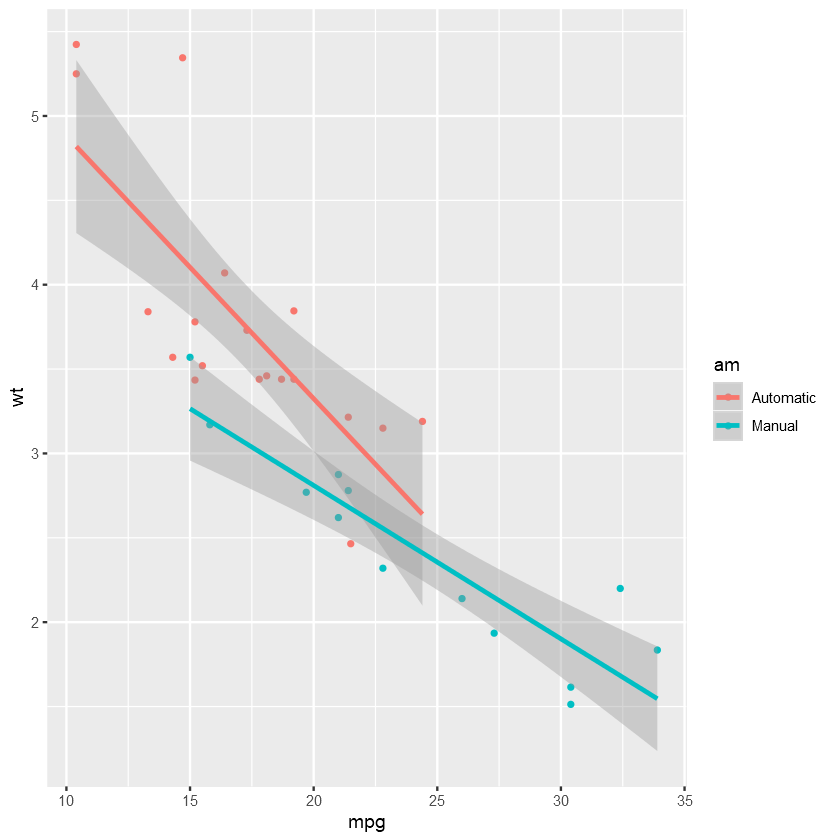

In [65]:
ggplot(data = mtcars, aes(x = mpg, y = wt, col = am ))+
geom_point(size = 1)+
geom_smooth( method = 'lm')

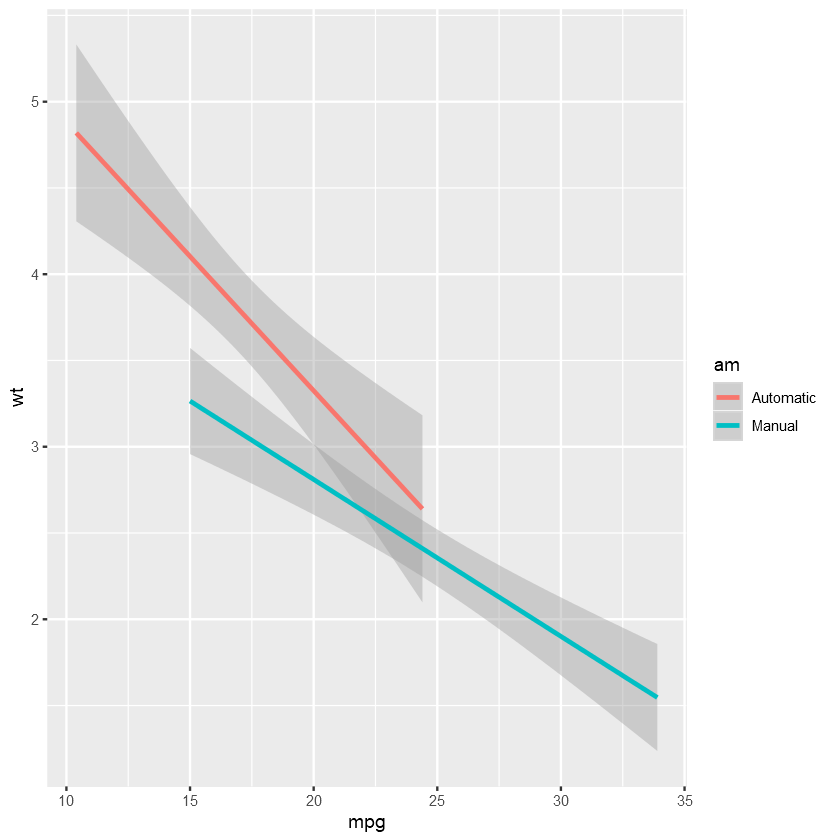

In [67]:
ggplot(data = mtcars, aes(x = mpg, y = wt, col = am ))+
geom_smooth( method = 'lm')

# 3.3 Множественная линейная регрессия. Отбор моделей

Сейчас мы поработаем со встроенным датасетом attitude. Рассмотрим две модели

````r
model_full <- lm(rating ~ ., data = attitude) 

model_null <- lm(rating ~ 1, data = attitude)
````

model_full - модель, которая предсказывает значение переменной рейтинг (rating) в зависимости от всех остальных переменных в данном датасете.

model_null - модель, в которой нет ни одного предиктора, а есть только intercept. Значение intercept - это просто среднее значение зависимой переменной. Соответственно, модель предоставляет нам информацию только о том, отличается ли это среднее от нуля.

Как говорилось в лекции, функция step позволяет нам подобрать модель с оптимальным количеством предикторов. С помощью аргумента scope мы можем задать пространство моделей с разным числом предикторов, в котором будет происходить поиск оптимального набора предикторов. Самый простой путь - задать границы возможных моделей с помощью нулевой и полной моделей.
```r
scope = list(lower = model_null, upper = model_full)
```
Аргумент direction позволяет задать направление поиска. 

Первый аргумент (object) задаёт начальную модель, с которой начинается поиск. Обратите внимание на то, что при разных значениях аргумента direction нужно использовать разные начальные модели. 

Функция step возвращает оптимальную модель.

Итак, задача! C помощью функции step найдите оптимальную модель для предсказания rating в датасете attitude. Model_full и model_null уже созданы. Сохраните команду с функцией step в переменную ideal_model. 

In [86]:
model_full <- lm(rating ~ ., data = attitude) 

model_null <- lm(rating ~ 1, data = attitude)

In [92]:
sc = list(lower = model_null, upper = model_full)

In [94]:
step(model_full,scope =sc )

Start:  AIC=123.36
rating ~ complaints + privileges + learning + raises + critical + 
    advance

             Df Sum of Sq    RSS    AIC
- critical    1      3.41 1152.4 121.45
- raises      1      6.80 1155.8 121.54
- privileges  1     14.47 1163.5 121.74
- advance     1     74.11 1223.1 123.24
<none>                    1149.0 123.36
- learning    1    180.50 1329.5 125.74
- complaints  1    724.80 1873.8 136.04

Step:  AIC=121.45
rating ~ complaints + privileges + learning + raises + advance

             Df Sum of Sq    RSS    AIC
- raises      1     10.61 1163.0 119.73
- privileges  1     14.16 1166.6 119.82
- advance     1     71.27 1223.7 121.25
<none>                    1152.4 121.45
+ critical    1      3.41 1149.0 123.36
- learning    1    177.74 1330.1 123.75
- complaints  1    724.70 1877.1 134.09

Step:  AIC=119.73
rating ~ complaints + privileges + learning + advance

             Df Sum of Sq    RSS    AIC
- privileges  1     16.10 1179.1 118.14
- advance     1     61.6


Call:
lm(formula = rating ~ complaints + learning, data = attitude)

Coefficients:
(Intercept)   complaints     learning  
     9.8709       0.6435       0.2112  


Сравните полную модель из предыдущего степа и оптимальную модель с помощью функции anova. Введите получившееся F-значение.

Разделителем дробной и целой части в ответе должна быть запятая. 

In [98]:
anova(model_full,lm(formula = rating ~ complaints + learning, data = attitude) )

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
23,1149.000,NA,NA,NA,NA
27,1254.649,-4,-105.6486,0.5287028,0.7157839


In [106]:
 lm(sr ~ (pop15 + pop75 + dpi + ddpi)^2 ,  LifeCycleSavings)


Call:
lm(formula = sr ~ (pop15 + pop75 + dpi + ddpi)^2, data = LifeCycleSavings)

Coefficients:
(Intercept)        pop15        pop75          dpi         ddpi  pop15:pop75  
  9.204e+00   -6.423e-02    3.886e+00    3.200e-04    1.126e+00   -9.288e-02  
  pop15:dpi   pop15:ddpi    pop75:dpi   pop75:ddpi     dpi:ddpi  
 -9.644e-07   -1.151e-02   -8.923e-04   -2.863e-01    7.613e-04  
